<a href="https://colab.research.google.com/github/kumardineshkumaraa/Miniproject/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Necessary Libraries and Load the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Install necessary libraries if not already installed
!pip install shap xgboost
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/updated_energy_dataset_with_consumption.csv")

In [ ]:
data.head()

,Date,Organization_ID,Energy_Consumption_kWh,Temperature_C,Humidity_%,Wind_Speed_kmh,Precipitation_mm,Weather_Condition,Lag_1,Lag_7,Rolling_Mean_3,Rolling_Std_3
0,2022-01-08,1,50.812566,18.338170,71.878682,10.190836,0.106448,Cloudy,537.594659,510.794951,520.093212,18.651689
1,2022-01-09,1,48.302450,19.874037,63.900811,13.739918,0.183311,Sunny,522.212633,498.955795,519.377748,19.787249
2,2022-01-10,1,53.331064,18.741672,72.075214,16.871219,0.159319,Cloudy,498.325953,515.534754,513.318148,13.058710
3,2022-01-11,1,48.231595,13.200519,75.804413,6.461631,3.614767,Snowy,519.415858,533.900718,505.961598,11.687097
4,2022-01-12,1,33.888194,14.491891,66.738486,17.446865,1.424173,Sunny,500.142982,499.615172,506.833157,10.904235


In [ ]:
# Step 2: Data Analysis and Visualization
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

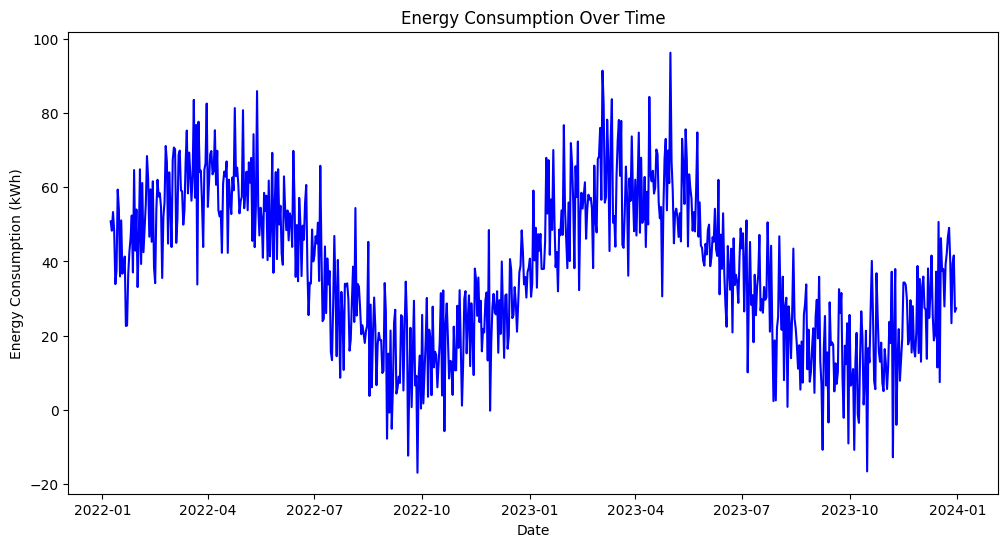

In [ ]:
# Plot Energy Consumption over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Energy_Consumption_kWh'], color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

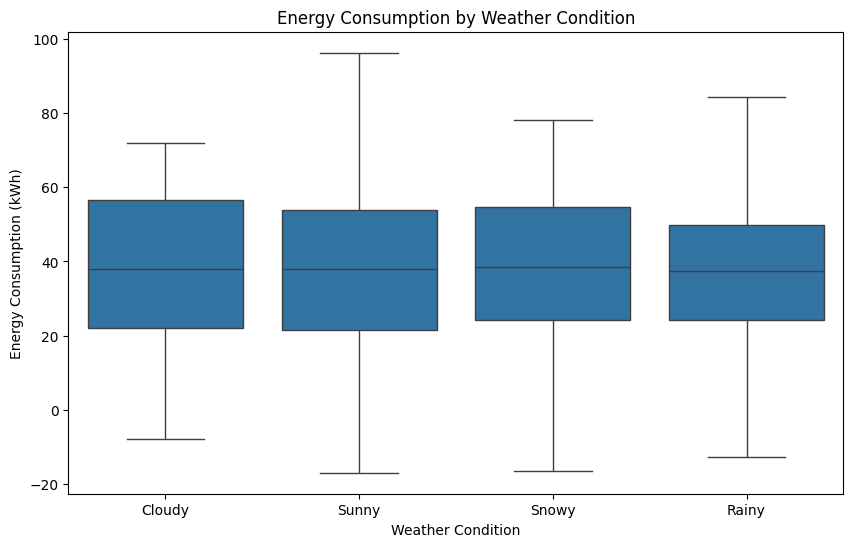

In [ ]:
# Plot Weather Condition vs. Energy Consumption
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_Condition', y='Energy_Consumption_kWh', data=data)
plt.title('Energy Consumption by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


In [ ]:
# Step 3: Feature Engineering
# Create Lagged Features
data['Lag_1'] = data['Energy_Consumption_kWh'].shift(1)  # Previous day's energy consumption
data['Lag_7'] = data['Energy_Consumption_kWh'].shift(7)  # Energy consumption from a week ago

In [ ]:
# Create Rolling Features
data['Rolling_Mean_3'] = data['Energy_Consumption_kWh'].rolling(window=3).mean()  # 3-day rolling mean
data['Rolling_Std_3'] = data['Energy_Consumption_kWh'].rolling(window=3).std()  # 3-day rolling standard deviation

In [ ]:
# Drop rows with NaN values (due to lagged or rolling feature creation)
data.dropna(inplace=True)



In [ ]:
# Display the first few rows of the updated dataset
data.head()


,Date,Organization_ID,Energy_Consumption_kWh,Temperature_C,Humidity_%,Wind_Speed_kmh,Precipitation_mm,Weather_Condition,Lag_1,Lag_7,Rolling_Mean_3,Rolling_Std_3
7,2022-01-15,1,54.146475,18.588851,65.743987,20.851902,0.326241,Sunny,59.389403,50.812566,50.372818,11.382653
8,2022-01-16,1,35.975491,16.268094,72.864493,23.157976,1.600940,Rainy,54.146475,48.302450,49.837123,12.287420
9,2022-01-17,1,51.071495,18.258358,68.970111,23.874032,0.394902,Sunny,35.975491,53.331064,47.064487,9.725649
10,2022-01-18,1,36.711939,16.538446,71.621438,24.202712,0.355794,Sunny,51.071495,48.231595,41.252975,8.511057
11,2022-01-19,1,37.816855,16.989661,65.032417,15.429193,0.264625,Cloudy,36.711939,33.888194,41.866763,7.990653


In [ ]:
# Step 4: Train-Test Split
# Define features and target variable
features = data.drop(columns=['Date', 'Energy_Consumption_kWh'])

In [ ]:
# Convert 'Weather_Condition' to categorical and encode it using one-hot encoding
if 'Weather_Condition' in features.columns:
    features['Weather_Condition'] = features['Weather_Condition'].astype('category')
    features = pd.get_dummies(features, columns=['Weather_Condition'], drop_first=True)

target = data['Energy_Consumption_kWh']


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train XGBoost Model
# Ensure all features are numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Step 6: Model Evaluation
# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of the XGBoost model: {mse}")

Mean Squared Error (MSE) of the XGBoost model: 80.08333666063739


In [ ]:
# Step 7: Model Explanation Using SHAP
# Initialize the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)


In [ ]:

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

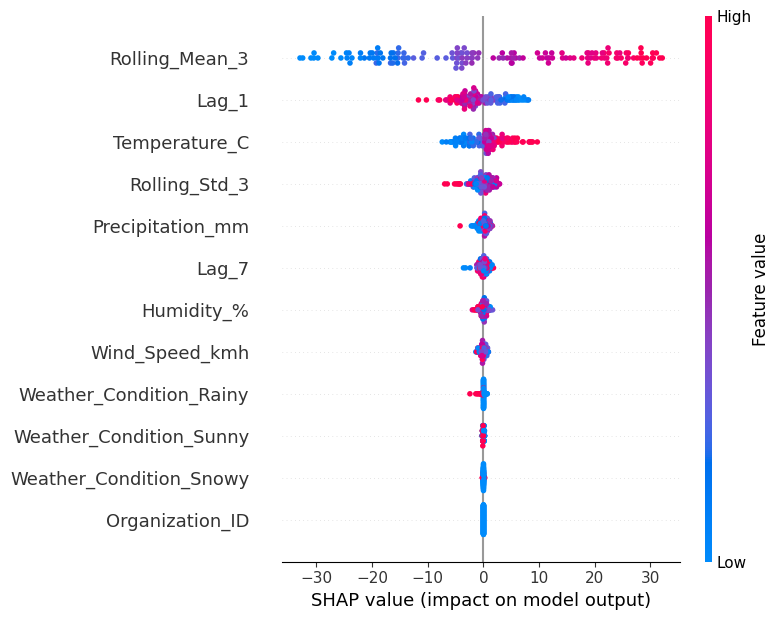

In [ ]:
# Plot summary of feature importance
shap.summary_plot(shap_values, X_test)


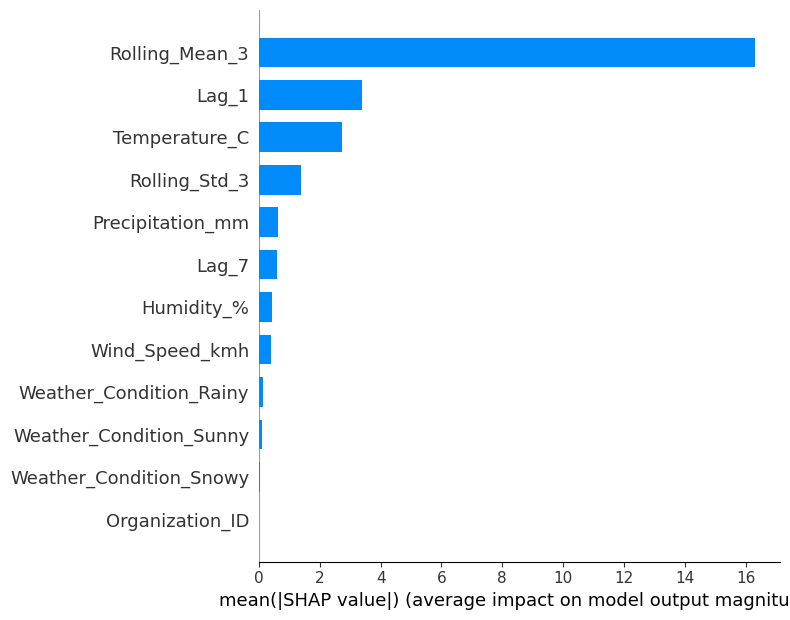

In [ ]:
# Plot feature importance bar chart
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
# Step 8: Prediction for the Current Year
# Load the current dataset (replace 'current_data_path' with actual path)
current_data = pd.read_csv("/content/synthetic_current_energy_data_full_year.csv")

In [ ]:
# Preprocess the current dataset
current_data['Date'] = pd.to_datetime(current_data['Date'])

In [ ]:
# Create Lagged and Rolling Features for the current dataset
current_data['Lag_1'] = current_data['Temperature'].shift(1)
current_data['Lag_7'] = current_data['Temperature'].shift(7)
current_data['Rolling_Mean_3'] = current_data['Temperature'].rolling(window=3).mean()
current_data['Rolling_Std_3'] = current_data['Temperature'].rolling(window=3).std()
current_data.dropna(inplace=True)

In [ ]:
# Prepare features for prediction
current_features = current_data.drop(columns=['Date'])
if 'Weather_Condition' in current_features.columns:
    current_features['Weather_Condition'] = current_features['Weather_Condition'].astype('category')
    current_features = pd.get_dummies(current_features, columns=['Weather_Condition'], drop_first=True)

In [ ]:
# Ensure all features are numeric
current_features = current_features.astype(float)


In [ ]:
# Align current features with training features
current_features = current_features.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# Ensure all features are numeric
current_features = current_features.astype(float)


In [ ]:
# Predict energy consumption for the current year
current_predictions = xgb_model.predict(current_features)

In [ ]:
# Add predictions to the current dataset
current_data['Predicted_Energy_Consumption_kWh'] = current_predictions


In [ ]:
# Display the first few rows of the current dataset with predictions
current_data.head()


,Date,Temperature,Humidity,Wind_Speed,Precipitation,Weather_Condition,Lag_1,Lag_7,Rolling_Mean_3,Rolling_Std_3,Predicted_Energy_Consumption_kWh
7,2024-01-08,18.140404,74.024546,1.676248,8.658469,Cloudy,28.302038,19.214521,22.727697,5.152223,14.106758
8,2024-01-09,18.930390,49.597088,3.010885,8.611478,Snowy,18.140404,23.672966,21.790944,5.652591,17.701857
9,2024-01-10,22.516540,52.107977,12.453859,8.341670,Snowy,18.930390,24.187638,19.862445,2.332206,15.930451
10,2024-01-11,15.536859,82.158281,8.623113,2.996064,Cloudy,22.516540,20.204738,18.994596,3.490283,15.204235
11,2024-01-12,21.296750,33.387945,12.822839,2.651283,Rainy,15.536859,21.710014,19.783383,3.727827,17.849560


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=current_data)

https://docs.google.com/spreadsheets/d/1wn69yWi-6IIJkF61AozDK4pMIQt_eylStm-pke68kp4#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# Step 6: Model Evaluation
# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate Mean Squared Error and R-squared Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) of the XGBoost model: {mse}")
print(f"R-squared Score (Accuracy) of the XGBoost model: {r2 * 100:.2f}%")


Mean Squared Error (MSE) of the XGBoost model: 80.08333666063739
R-squared Score (Accuracy) of the XGBoost model: 82.42%


In [ ]:
current_data.to_csv('current_energy_predictions_final.csv', index=False)


In [ ]:
# Load the final dataset to display columns
import pandas as pd

final_data = pd.read_csv('current_energy_predictions_final.csv')
print(final_data.columns)


Index(['Date', 'Temperature', 'Humidity', 'Wind_Speed', 'Precipitation',
       'Weather_Condition', 'Lag_1', 'Lag_7', 'Rolling_Mean_3',
       'Rolling_Std_3', 'Predicted_Energy_Consumption_kWh'],
      dtype='object')


In [ ]:
print(data.columns)


Index(['Date', 'Organization_ID', 'Energy_Consumption_kWh', 'Temperature_C',
       'Humidity_%', 'Wind_Speed_kmh', 'Precipitation_mm', 'Weather_Condition',
       'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3'],
      dtype='object')


In [ ]:
# Load the dataset and trained model
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.datasets import load_diabetes


In [ ]:
# Example dataset for demonstration (replace with your actual data)
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a sample XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Explainable AI with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

In [ ]:
# Theoretical explanation generation
def generate_model_explanation(shap_values, feature_names):
    explanation_text = []
    mean_shap_values = np.abs(shap_values.values).mean(axis=0)  # Average magnitude of SHAP values for each feature
    sorted_indices = np.argsort(mean_shap_values)[::-1]  # Sort features by importance in descending order

    explanation_text.append("The model's predictions are primarily influenced by the following features:\n")
    for idx in sorted_indices[:5]:  # Provide details for top 5 features
        explanation_text.append(f"- Feature '{feature_names[idx]}' has an average impact of {mean_shap_values[idx]:.4f} on the model's output.")

    explanation_text.append("\nBelow is a brief summary of each important feature:")
    for idx in sorted_indices[:5]:
        feature_name = feature_names[idx]
        feature_impact = mean_shap_values[idx]
        explanation_text.append(
            f"\nFeature '{feature_name}':\n"
            f"This feature has a significant impact on the prediction with an average SHAP value magnitude of {feature_impact:.4f}. "
            f"This means that changes in '{feature_name}' tend to lead to considerable changes in the model's predicted output, indicating that it is one of the key driving factors for energy consumption."
        )

    return "\n".join(explanation_text)


In [ ]:
# Generate explanation text
feature_names = X.columns
explanation_text = generate_model_explanation(shap_values, feature_names)


In [ ]:
# Display the theoretical explanation
print(explanation_text)


The model's predictions are primarily influenced by the following features:

- Feature 's5' has an average impact of 24.0285 on the model's output.
- Feature 'bmi' has an average impact of 20.8081 on the model's output.
- Feature 'bp' has an average impact of 10.0219 on the model's output.
- Feature 's3' has an average impact of 9.1039 on the model's output.
- Feature 'sex' has an average impact of 7.2208 on the model's output.

Below is a brief summary of each important feature:

Feature 's5':
This feature has a significant impact on the prediction with an average SHAP value magnitude of 24.0285. This means that changes in 's5' tend to lead to considerable changes in the model's predicted output, indicating that it is one of the key driving factors for energy consumption.

Feature 'bmi':
This feature has a significant impact on the prediction with an average SHAP value magnitude of 20.8081. This means that changes in 'bmi' tend to lead to considerable changes in the model's predicted 

In [ ]:
# Save explanation to a text file for report
with open("model_theoretical_explanation.txt", "w") as f:
    f.write(explanation_text)


In [ ]:
# Import necessary libraries
import pandas as pd
import shap
import numpy as np

In [ ]:
# Load the dataset and trained model
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
# Load your specific dataset
historical_data = pd.read_csv('/content/updated_energy_dataset_with_consumption.csv')

In [ ]:
# Print column names to verify
print(historical_data.columns)


Index(['Date', 'Organization_ID', 'Energy_Consumption_kWh', 'Temperature_C',
       'Humidity_%', 'Wind_Speed_kmh', 'Precipitation_mm', 'Weather_Condition',
       'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3'],
      dtype='object')


In [ ]:
print(historical_data.columns)


Index(['Date', 'Organization_ID', 'Energy_Consumption_kWh', 'Temperature_C',
       'Humidity_%', 'Wind_Speed_kmh', 'Precipitation_mm', 'Weather_Condition',
       'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3'],
      dtype='object')


In [ ]:
# Selecting features and target column
features = historical_data[['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation', 'Weather_Condition', 'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3']]
target = historical_data['Energy_Consumption_kWh']

KeyError: "['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation'] not in index"

In [ ]:
features = historical_data[['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation', 'Weather_Condition', 'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3']]

KeyError: "['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation'] not in index"

In [ ]:
# Print all column names to check for misspellings or missing columns
print(historical_data.columns)

Index(['Date', 'Organization_ID', 'Energy_Consumption_kWh', 'Temperature_C',
       'Humidity_%', 'Wind_Speed_kmh', 'Precipitation_mm', 'Weather_Condition',
       'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3'],
      dtype='object')


In [ ]:
# Example: Assuming 'temperature' was misspelled
features = historical_data[['temperature', 'Humidity', 'Wind_Speed', 'Precipitation', 'Weather_Condition', 'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3']]
#target = historical_data['Energy_Consumption_kWh'] # Target remains the same

KeyError: "['temperature', 'Humidity', 'Wind_Speed', 'Precipitation'] not in index"

In [ ]:
# Print all column names to check for misspellings or missing columns
print(historical_data.columns)

# Correct the column names in your features selection
features = historical_data[['Energy_Consumption_kWh','Temperature', 'Humidity', 'Wind_Speed', 'Precipitation', 'Weather_Condition', 'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3']]
target = historical_data['Energy_Consumption_kWh'] # Target remains the same

Index(['Date', 'Organization_ID', 'Energy_Consumption_kWh', 'Temperature_C',
       'Humidity_%', 'Wind_Speed_kmh', 'Precipitation_mm', 'Weather_Condition',
       'Lag_1', 'Lag_7', 'Rolling_Mean_3', 'Rolling_Std_3'],
      dtype='object')


KeyError: "['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation'] not in index"